In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
CELL_TYPE="beta"

In [5]:
celltype_modules = pd.read_csv(f"network_construction/{CELL_TYPE}cells_allgenes_ND_25neighbors_modules.tsv", sep="\t")

In [24]:
celltype_modules

,gene_name,module,color,kME_grey,kME_betacells_allgenes_ND_25neighbors-M1,kME_betacells_allgenes_ND_25neighbors-M2,kME_betacells_allgenes_ND_25neighbors-M3,kME_betacells_allgenes_ND_25neighbors-M4,kME_betacells_allgenes_ND_25neighbors-M5
AL627309.5,AL627309.5,grey,grey,0.016213,0.006755,0.027964,0.010021,0.030376,-0.001208
LINC01409,LINC01409,grey,grey,-0.056049,0.008690,-0.034385,0.072410,0.061238,0.083825
LINC01128,LINC01128,betacells_allgenes_ND_25neighbors-M1,turquoise,0.126961,-0.038470,0.038894,-0.011346,0.042720,-0.078737
SAMD11,SAMD11,betacells_allgenes_ND_25neighbors-M1,turquoise,0.133518,-0.031511,0.049914,-0.095160,-0.121487,-0.133119
NOC2L,NOC2L,betacells_allgenes_ND_25neighbors-M1,turquoise,0.072467,-0.016091,0.010928,-0.025333,-0.024731,-0.059953
...,...,...,...,...,...,...,...,...,...
MT-ND3,MT-ND3,betacells_allgenes_ND_25neighbors-M1,turquoise,0.134018,-0.087886,-0.036128,-0.095696,-0.185534,-0.166162
MT-ND4,MT-ND4,betacells_allgenes_ND_25neighbors-M1,turquoise,0.141706,-0.147977,-0.105328,-0.077969,-0.222853,-0.195884
MT-ND5,MT-ND5,betacells_allgenes_ND_25neighbors-M1,turquoise,0.140786,-0.118653,-0.070570,-0.062468,-0.175844,-0.168122
MT-CYB,MT-CYB,betacells_allgenes_ND_25neighbors-M1,turquoise,0.155514,-0.118144,-0.068900,-0.087229,-0.198621,-0.195959


In [7]:
tfs = pd.read_excel("/cellar/users/aklie/data/beta_cell_networks/auxiliary/SC-beta_TFs.xlsx", sheet_name=0)

In [10]:
in_vitro_tfs = tfs["in vitro SC-beta specific"].dropna().values
sc_beta_specific = tfs["SC-beta specific compared to primary beta"].dropna().values
sc_beta_shared = tfs["SC-β & primary-β shared TFs"].dropna().values

In [28]:
from matplotlib_venn import venn2

in vitro SC-beta specific
{'TCF12', 'FOXP2', 'BACH1', 'ATF2', 'HMBOX1', 'TCF4', 'FOXN2', 'KLF7', 'KLF12'}
set()
set()
{'BACH2', 'JUND', 'SOX11', 'ZBTB5', 'NFYA', 'MAFB', 'MAF', 'VEZF1', 'KLF6', 'CREB5', 'ZBTB8B', 'ZNF281', 'EBF3', 'ZBTB37'}
{'MZF1', 'MAFG', 'PDX1', 'ETV4', 'ASCL2', 'PAX4', 'ISL1', 'RXRA', 'ISX', 'FOXK2', 'EBF4', 'IRF9', 'ZNF384'}
{'NR1H4', 'ONECUT2', 'EBF1'}
SC-beta specific compared to primary beta
{'TCF12', 'ESRRG', 'FOXP2', 'BACH1', 'RFX7', 'HMBOX1', 'NR3C1', 'KLF7', 'FOXP1', 'PBX3', 'KLF12', 'CLOCK', 'RFX3', 'MXD1'}
{'KLF5', 'ETV1', 'FOXA1'}
{'HNF4G'}
{'ZBTB43', 'ZNF317', 'SOX11', 'ZBTB5', 'E2F5', 'MAFB', 'MAF', 'NFE2L3', 'CREB1', 'CEBPG', 'TCF7', 'MAX', 'EBF3', 'MEF2C'}
{'ETV4', 'GATA4', 'PAX4', 'ASCL2', 'ZNF460', 'LMX1B', 'ISX', 'GLI2', 'ATF7', 'DDIT3', 'PDX1', 'ASCL1', 'MYCN', 'PATZ1', 'RELB', 'MLX', 'SOX4', 'HES6', 'SOX12'}
{'LMX1A', 'NR1H4', 'ONECUT2'}
SC-β & primary-β shared TFs
{'FOXP2', 'MEIS1', 'FOXO1', 'IKZF2'}
set()
set()
{'JUND', 'STAT1', 'MAX'}
{'PDX1'

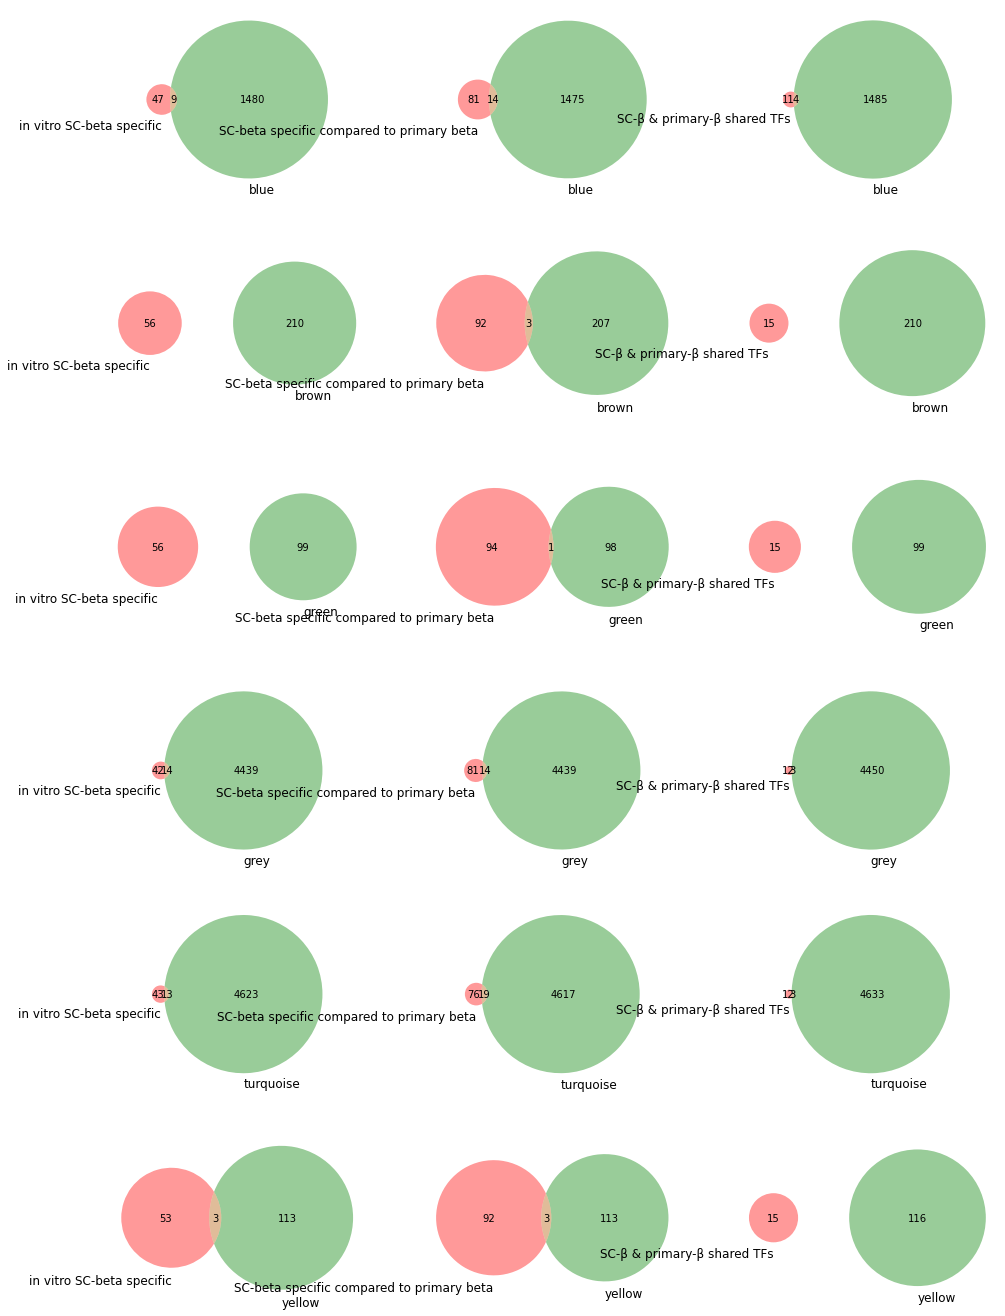

In [50]:
fig, ax = plt.subplots(6, 3, figsize=(16,24))
i, j = 0, 0
for list_name, tf_list in zip(["in vitro SC-beta specific", 
                    "SC-beta specific compared to primary beta",
                    "SC-β & primary-β shared TFs"],[in_vitro_tfs, sc_beta_specific, sc_beta_shared]):
    print(list_name)
    for module, group in celltype_modules.groupby("color"):
        inter = set.intersection(set(tf_list), set(group.index))
        print(inter)
        venn2([set(tf_list), set(group.index)], set_labels=[list_name, module], ax=ax[i][j])
        i+=1
    i=0
    j+=1

In [4]:
celltype_modules

,gene_name,module,color,kME_grey,kME_betacells_allgenes_ND_25neighbors-M1,kME_betacells_allgenes_ND_25neighbors-M2,kME_betacells_allgenes_ND_25neighbors-M3,kME_betacells_allgenes_ND_25neighbors-M4,kME_betacells_allgenes_ND_25neighbors-M5
AL627309.5,AL627309.5,grey,grey,0.016213,0.006755,0.027964,0.010021,0.030376,-0.001208
LINC01409,LINC01409,grey,grey,-0.056049,0.008690,-0.034385,0.072410,0.061238,0.083825
LINC01128,LINC01128,betacells_allgenes_ND_25neighbors-M1,turquoise,0.126961,-0.038470,0.038894,-0.011346,0.042720,-0.078737
SAMD11,SAMD11,betacells_allgenes_ND_25neighbors-M1,turquoise,0.133518,-0.031511,0.049914,-0.095160,-0.121487,-0.133119
NOC2L,NOC2L,betacells_allgenes_ND_25neighbors-M1,turquoise,0.072467,-0.016091,0.010928,-0.025333,-0.024731,-0.059953
...,...,...,...,...,...,...,...,...,...
MT-ND3,MT-ND3,betacells_allgenes_ND_25neighbors-M1,turquoise,0.134018,-0.087886,-0.036128,-0.095696,-0.185534,-0.166162
MT-ND4,MT-ND4,betacells_allgenes_ND_25neighbors-M1,turquoise,0.141706,-0.147977,-0.105328,-0.077969,-0.222853,-0.195884
MT-ND5,MT-ND5,betacells_allgenes_ND_25neighbors-M1,turquoise,0.140786,-0.118653,-0.070570,-0.062468,-0.175844,-0.168122
MT-CYB,MT-CYB,betacells_allgenes_ND_25neighbors-M1,turquoise,0.155514,-0.118144,-0.068900,-0.087229,-0.198621,-0.195959


In [194]:
all_celltype_modules_kmes = all_modules[all_modules.columns[all_modules.columns.str.contains("kME_all")]]
celltype_modules_kmes = celltype_modules[celltype_modules.columns[celltype_modules.columns.str.contains(f"kME_{CELL_TYPE}")]]

In [195]:
shared_genes = set.intersection(set(all_modules.index), set(celltype_modules.index))
all_celltype_modules_kmes_shared = all_celltype_modules_kmes.loc[shared_genes]
celltype_modules_kmes_shared = celltype_modules_kmes.loc[shared_genes]

In [196]:
np.all(all_celltype_modules_kmes_shared.index == celltype_modules_kmes_shared.index)

True

In [197]:
all_celltype_modules_kmes.isna().sum()

kME_allcells_ND_25neighbors-M1     0
kME_allcells_ND_25neighbors-M2     0
kME_allcells_ND_25neighbors-M3     0
kME_allcells_ND_25neighbors-M4     0
kME_allcells_ND_25neighbors-M5     0
kME_allcells_ND_25neighbors-M6     0
kME_allcells_ND_25neighbors-M7     0
kME_allcells_ND_25neighbors-M8     0
kME_allcells_ND_25neighbors-M9     0
kME_allcells_ND_25neighbors-M10    0
dtype: int64

In [198]:
celltype_modules_kmes_shared.isna().sum()

kME_beta.uprhicells_allgenes_ND_25neighbors-M1    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M2    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M3    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M4    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M5    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M6    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M7    0
kME_beta.uprhicells_allgenes_ND_25neighbors-M8    0
dtype: int64

In [199]:
concat_df = pd.concat([all_celltype_modules_kmes_shared, celltype_modules_kmes_shared], axis=1)

In [200]:
concat_df.columns

Index(['kME_allcells_ND_25neighbors-M1', 'kME_allcells_ND_25neighbors-M2',
       'kME_allcells_ND_25neighbors-M3', 'kME_allcells_ND_25neighbors-M4',
       'kME_allcells_ND_25neighbors-M5', 'kME_allcells_ND_25neighbors-M6',
       'kME_allcells_ND_25neighbors-M7', 'kME_allcells_ND_25neighbors-M8',
       'kME_allcells_ND_25neighbors-M9', 'kME_allcells_ND_25neighbors-M10',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M1',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M2',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M3',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M4',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M5',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M6',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M7',
       'kME_beta.uprhicells_allgenes_ND_25neighbors-M8'],
      dtype='object')

In [201]:
focus_cols = celltype_modules.columns[celltype_modules.columns.str.contains(f"kME_{CELL_TYPE}")]
corr_df = concat_df.corr().filter(focus_cols).drop(focus_cols)

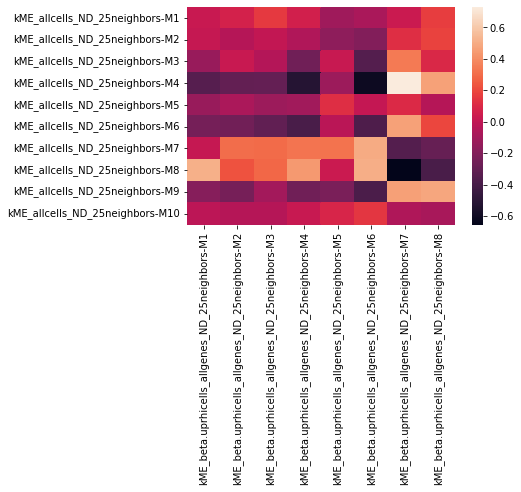

In [202]:
sns.heatmap(corr_df)

In [203]:
all_modules_groupby = all_modules.groupby("module")
celltype_modules_groupby = celltype_modules.groupby("module")

In [204]:
intersections = []
for all_module, all_modules_group in all_modules_groupby:
    if all_module == "grey":
        continue
    genes_in_all_modules = all_modules_group.index
    for celltype_module, celltype_modules_group in celltype_modules_groupby:
        if celltype_module == "grey":
            continue
        genes_in_apha_modules = celltype_modules_group.index
        intersection = set.intersection(set(genes_in_all_modules), set(genes_in_apha_modules))
        intersections.append([all_module, celltype_module, len(intersection)])

In [205]:
shared_df = pd.DataFrame(data=intersections, columns=["allcells_module", f"{CELL_TYPE}cells_module", "num_shared"])

In [206]:
shared_df = shared_df.set_index(["allcells_module", f"{CELL_TYPE}cells_module"]).iloc[:25]

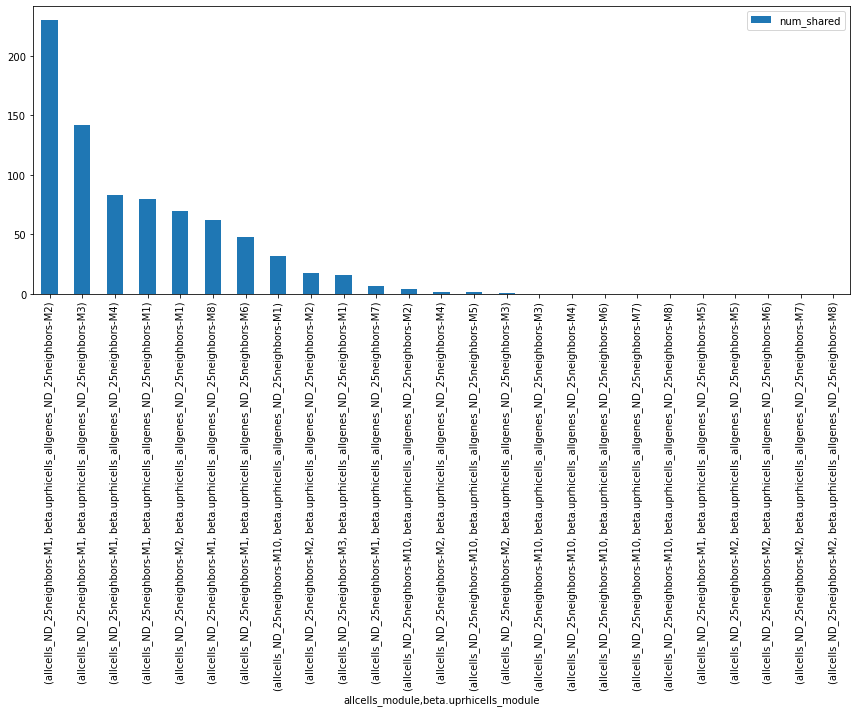

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))
shared_df.sort_values("num_shared", ascending=False).plot(kind="bar", ax=ax)
plt.tight_layout()